In [ ]:
## British Election Study Wave 21

In [1]:
%%time
dataset_name = "W21_only"
df_list = []

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}


Toggle code

IndexError: index 0 is out of bounds for axis 0 with size 0

Wall time: 1min 5s


In [2]:
df = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W21_only\\BES2019_W21_v21.0.dta" )

In [4]:
df.to_pickle("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W21_only\\BES2019_W21_v21.0.zip", compression='zip')

In [ ]:
## add entries to manifest

In [40]:
df["age"] = df["age"].astype(int)

In [41]:
df_num = pd.get_dummies(df.drop(['id','wt','pcon'],axis=1)).select_dtypes('number')

In [10]:
import pickle
def dim_red(df,n_components=None,red_type="Factor Analysis",show_first_x_comps=4,display_comp=True):

    Treatment = "Census Data Decomposition"
    output_folder = "E:\\BES_analysis_data\\output\\CensusDataDecomposition\\"
    output_subfolder = output_folder + Treatment + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )

    decomp_index = df.index
    decomp_columns = df.columns
    clean_feature_set_std = StandardScaler().fit_transform(df.values)
    decomp_std = pd.DataFrame(   clean_feature_set_std,
                                 columns = decomp_columns,
                                 index   = decomp_index      )
    if n_components is None:
        n_components = decomp_std.shape[1]
    
    # n_components = 4
    # (svd_solver='full', n_components='mle',whiten=True)
    
    if red_type == "Factor Analysis":
        decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hr
    elif red_type == "PCA":
        decomp = PCA(n_components = n_components,svd_solver='full')    
    decomp_method = str(decomp).split("(")[0] 
    X_r = decomp.fit_transform(decomp_std)
    
    n_components = min(n_components,X_r.shape[1])
    BES_decomp = pd.DataFrame(   X_r,
                                 columns = range(0,n_components),
                                 index   = decomp_index)

#     save = True # False => Load
#     if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
#         decomp_method = str(decomp).split("(")[0] 
#         subdir = output_subfolder + decomp_method
#         fname = subdir+ os.sep + decomp_method
    subdir = output_subfolder + decomp_method
    if display_comp:
        (BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                              decomp_columns, BES_decomp, manifest=None, 
                                                              save_folder = subdir,  
                                                              show_first_x_comps= show_first_x_comps, show_histogram = False)    
        return (BES_decomp, comp_labels, comp_dict)
    else:
        return BES_decomp

In [13]:
df_num.isnull().sum().sort_values()

snpLookAfterUnemp_Fairly closely      0
populismExp4_Disagree                 0
populismExp4_Strongly disagree        0
populismExp2_Don't know               0
populismExp2_Strongly agree           0
                                   ... 
benchCoronaUK_26                      0
benchCoronaUK_25                      0
benchCoronaUK_33                      0
p_country_birth                      66
pano                                145
Length: 5584, dtype: int64

In [42]:
df_num["p_country_birth"] = df_num["p_country_birth"].fillna(1.0)
# lazy, fill with most common
df_num.drop(['pano'],axis=1,inplace=True)
df_num["p_country_birth"] = df_num["p_country_birth"].astype('category')
df_num["gor"] = df_num["gor"].astype('category')
df_num = pd.get_dummies(df_num)

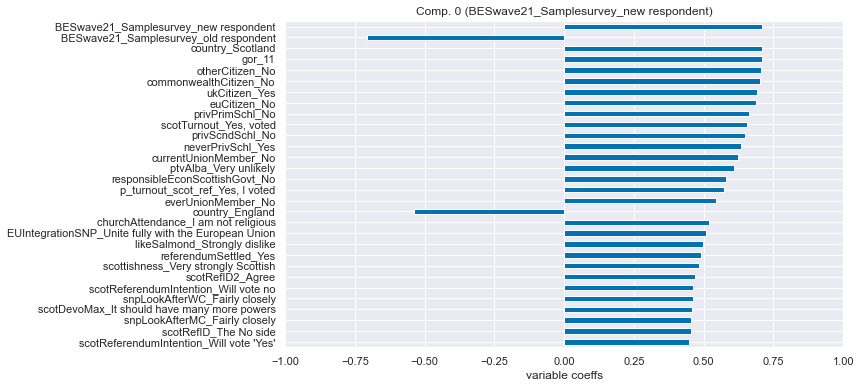

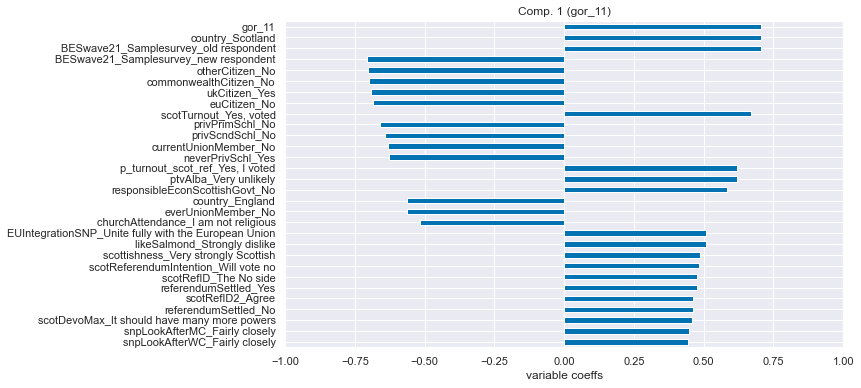

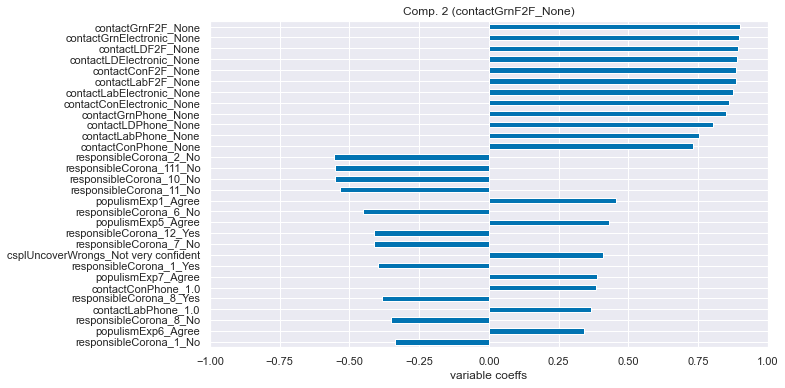

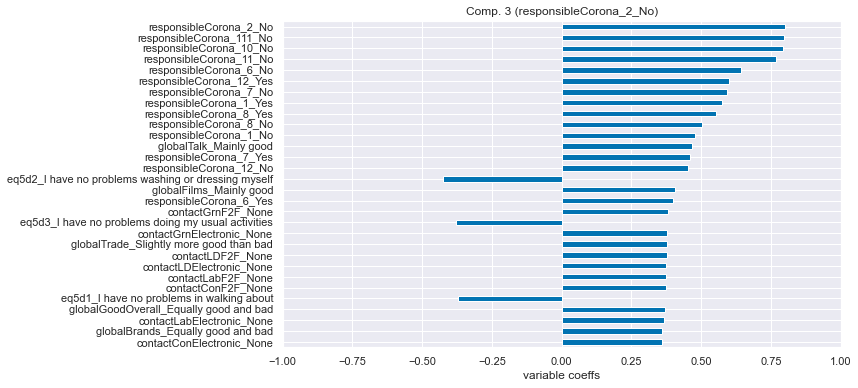

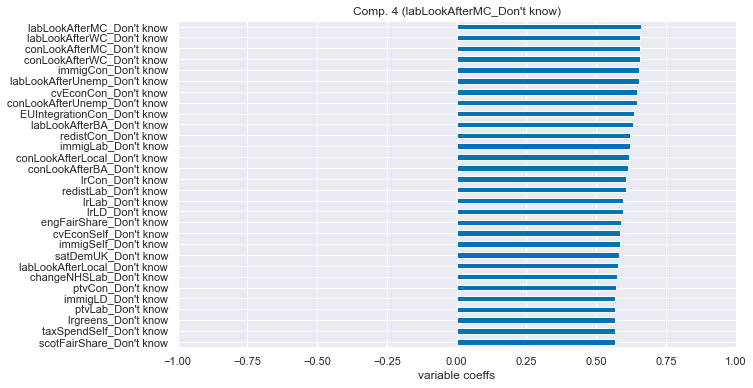

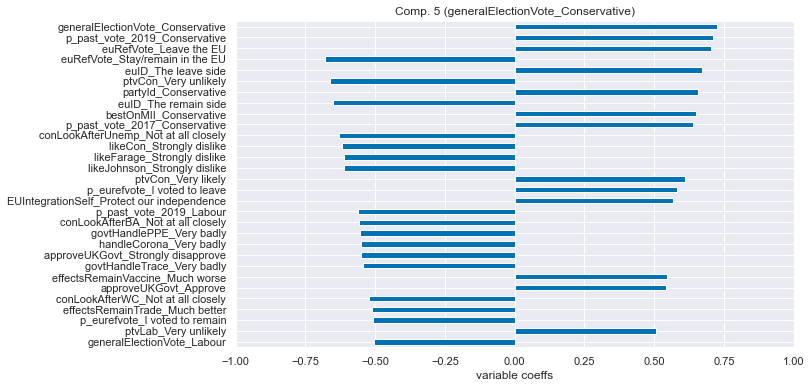

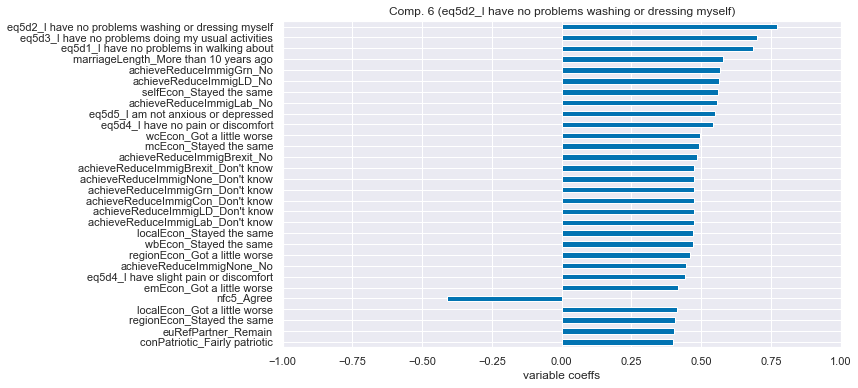

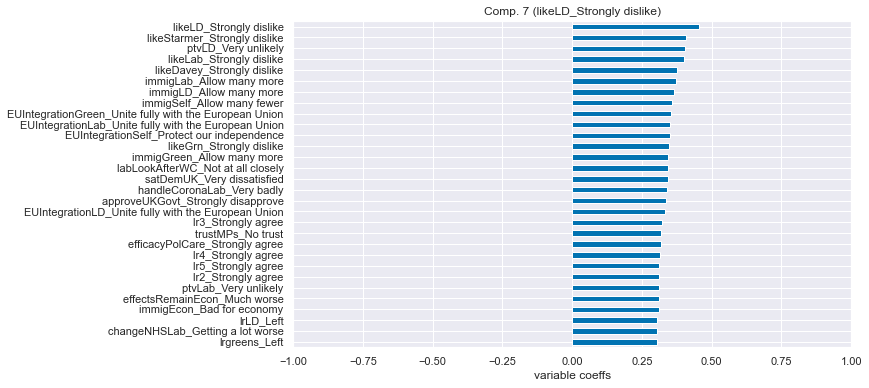

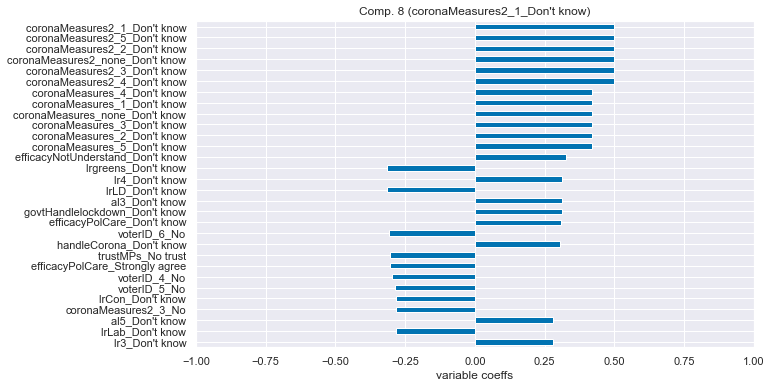

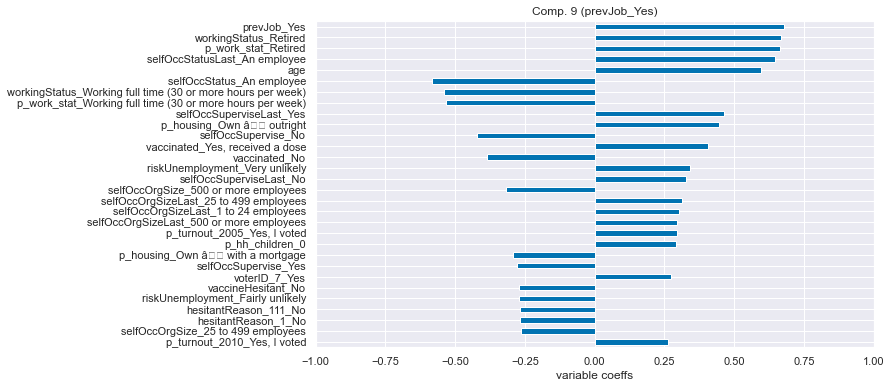

In [51]:
n_compFA = 10
n_comp = 10

(BES_decomp, comp_labels, comp_dict) = dim_red(df_num[variance[variance>.02].index], n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [43]:
variance = df_num.var()

In [46]:
variance.sort_values().tail(50)

likeBrexitParty_Don't know                                                          0.244766
_merge_matched (3)                                                                  0.244794
_merge_master only (1)                                                              0.244794
pccTurnout_Yes, voted                                                               0.244818
gender_Male                                                                         0.245547
gender_Female                                                                       0.245551
euID2_Agree                                                                         0.245617
prevJob_Yes                                                                         0.245657
selfOccStatus_An employee                                                           0.246221
p_hh_size_2                                                                         0.246516
likeFarage_Strongly dislike                                           

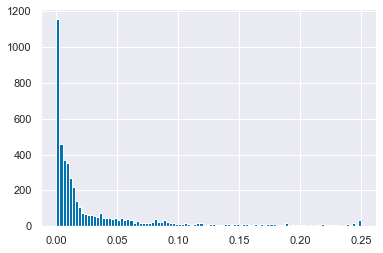

In [48]:
variance[variance<1].hist(bins=100)

,age,turnoutUKGeneral_Very unlikely that I would vote,turnoutUKGeneral_Fairly unlikely,turnoutUKGeneral_Neither likely nor unlikely,turnoutUKGeneral_Fairly likely,turnoutUKGeneral_Very likely that I would vote,turnoutUKGeneral_Don't know,generalElectionVote_I would/did not vote,generalElectionVote_Conservative,generalElectionVote_Labour,...,gor_3,gor_4,gor_5,gor_6,gor_7,gor_8,gor_9,gor_10,gor_11,p_country_birth_1.0
0,69,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,64,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,83,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,75,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,49,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30276,50,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
30277,34,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
30278,47,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
30279,61,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
50 x 6 ^ day

In [52]:
np.log(84000000/50)/np.log(6)

8.00012758272465